In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
sns.set(style='darkgrid')
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

30.490196261682254

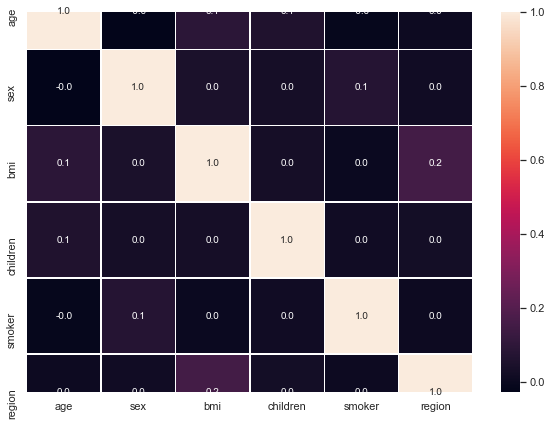

In [11]:
# Code starts here
X_train = pd.read_csv('train.csv')
X_train=X_train.drop('Id',axis=1)

X=X_train.drop('insuranceclaim',axis=1)
y=X_train['insuranceclaim']

X.isnull().sum()
y.isnull().sum()

X = X.drop('charges',axis=1)

f,ax = plt.subplots(figsize=(10, 7))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

np.mean(X_train['age'])
np.mean(X_train['children'])
np.mean(X_train['bmi'])

# Code ends here.

### EDA & Data Preprocessing

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

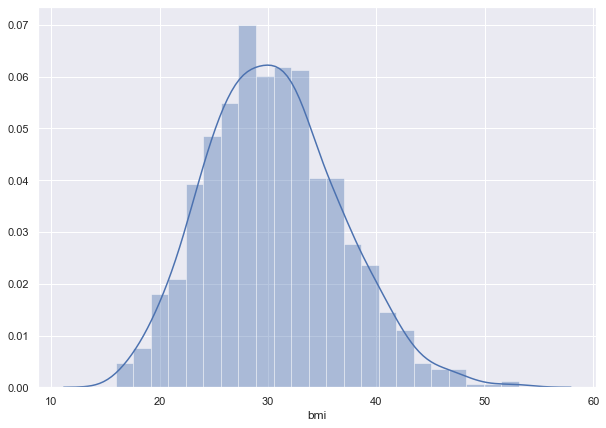

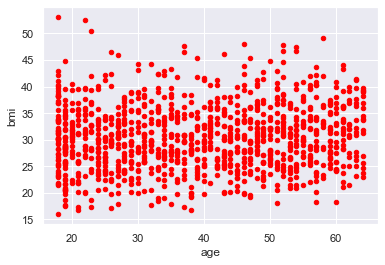

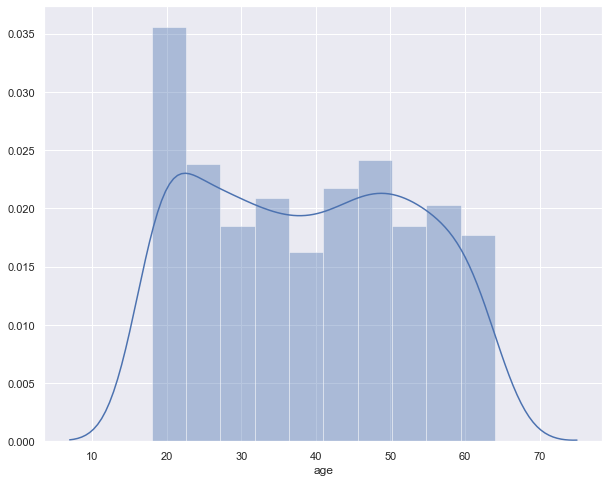

<Figure size 1080x1080 with 0 Axes>

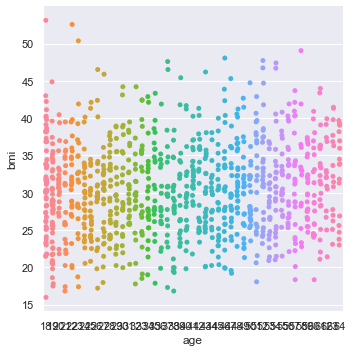

In [12]:
# Code starts here

categorical = X.select_dtypes(include='object')
numeric = list(X.select_dtypes(include='number'))

plt.figure(figsize=(10,7))
sns.distplot(X['bmi'])
X.plot.scatter(x='age', y='bmi',c='red')
plt.figure(figsize=(10,8))
sns.distplot(X['age'])

plt.figure(figsize=(15,15))
sns.catplot(x="age", y="bmi", data=X)





# Code ends here.

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using logistic regression, predict the insuranceclaim. Select the best model by cross-validation using Grid Search.
- Try improving upon the `roc_auc_score` using different parameters for Grid Search that give the best score.



In [13]:
# Code starts here
from sklearn.preprocessing import MinMaxScaler


ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
tuned_parameters = [
                    {'C': [0.01, 0.1, 1],
                     'penalty': ['l1'],
                     'solver': ['liblinear']}]

#grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

X_train,X_val,y_train,y_val=train_test_split(X,y ,test_size=0.2,random_state=8)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)

# scaler= MinMaxScaler()
# # Standardize data
# X_train = scaler.fit_transform(X_train)
# #scaler.transform(X_train)
# X_val = scaler.transform(X_val)

logistic=LogisticRegression()
loggrid = GridSearchCV(logistic, tuned_parameters, cv=10)

loggrid.fit(x_poly,y_train)

xx_poly = polynomial_features.fit_transform(X_val)

pred = loggrid.predict(xx_poly)

roc = roc_auc_score(y_val, pred)

roc



# Code ends here.

0.871545827633379

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [23]:
# Code starts here
T_test=pd.read_csv('test.csv')
tt = T_test.drop(['Id','charges'],axis=1)
t_poly = polynomial_features.fit_transform(tt)

prediction = loggrid.predict(t_poly)

oo = pd.DataFrame({'Id': T_test.Id, 'insuranceclaim': prediction})
oo.to_csv('tt.csv', index=False)
oo








# Code ends here.

,Id,insuranceclaim
0,811,0
1,973,1
2,308,1
3,845,1
4,1050,1
...,...,...
263,461,1
264,626,0
265,614,1
266,636,0
